In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,278.301181,271.842687,274.702086,275.360511,3.506222e+07,274.209203
std,49.947055,48.847814,49.319136,49.517511,1.694938e+07,50.076911
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,236.507496,232.532497,233.674995,234.597496,2.391362e+07,232.711544
50%,276.274994,266.599991,269.404999,272.354996,3.052870e+07,271.299240
75%,318.489990,311.854996,314.817497,314.997505,4.057110e+07,314.631134
max,399.820007,385.959991,395.959991,390.899994,1.067212e+08,390.899994


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-07-17 to 2020-07-17
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


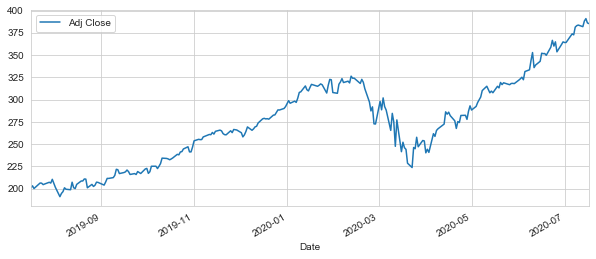

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

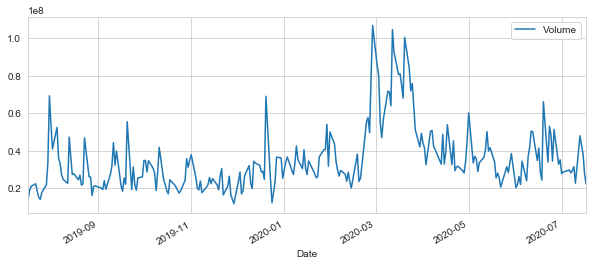

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [11]:
# Moving averages

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

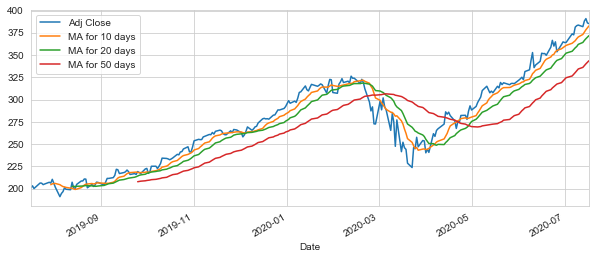

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-07-17,205.089996,203.270004,204.050003,203.350006,14107500.0,200.951736,NaN,NaN,NaN
2019-07-18,205.880005,203.699997,204.000000,205.660004,18582200.0,203.234497,NaN,NaN,NaN
2019-07-19,206.500000,202.360001,205.789993,202.589996,20929300.0,200.200699,NaN,NaN,NaN
2019-07-22,207.229996,203.610001,203.649994,207.220001,22277900.0,204.776108,NaN,NaN,NaN
2019-07-23,208.910004,207.289993,208.460007,208.839996,18355200.0,206.376984,NaN,NaN,NaN


### Daily Return Analysis

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

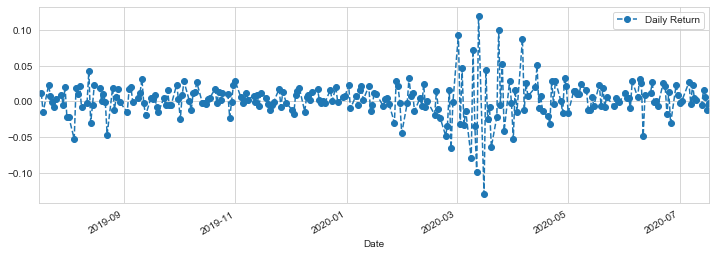

In [15]:
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

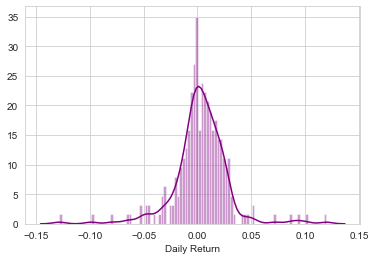

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [17]:
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [18]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-17,200.951736,1146.349976,134.613541,1992.030029
2019-07-18,203.234497,1146.329956,134.761719,1977.900024
2019-07-19,200.200699,1130.099976,134.959274,1964.520020
2019-07-22,204.776108,1138.069946,136.747269,1985.630005
2019-07-23,206.376984,1146.209961,137.596817,1994.489990


In [19]:
tech_rets = closing_df.pct_change()

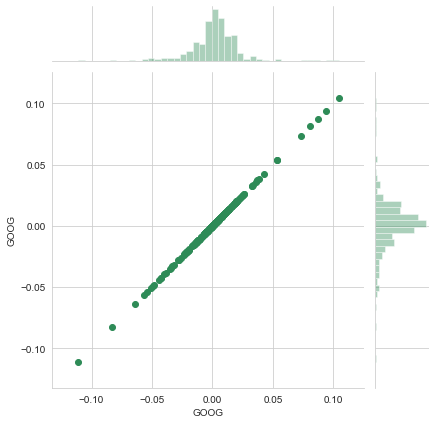

In [20]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

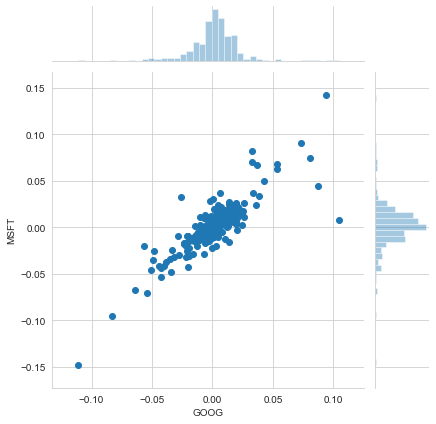

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

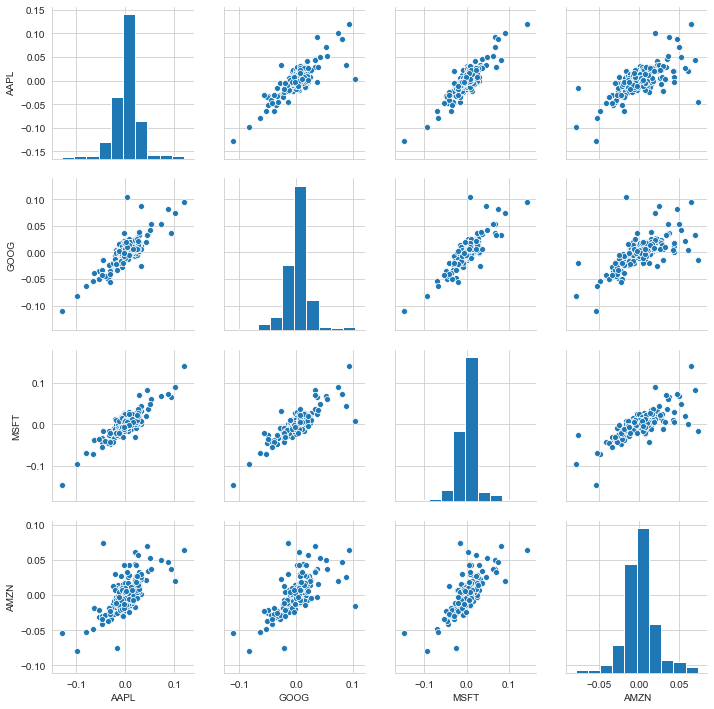

In [22]:
sns.pairplot(tech_rets.dropna())

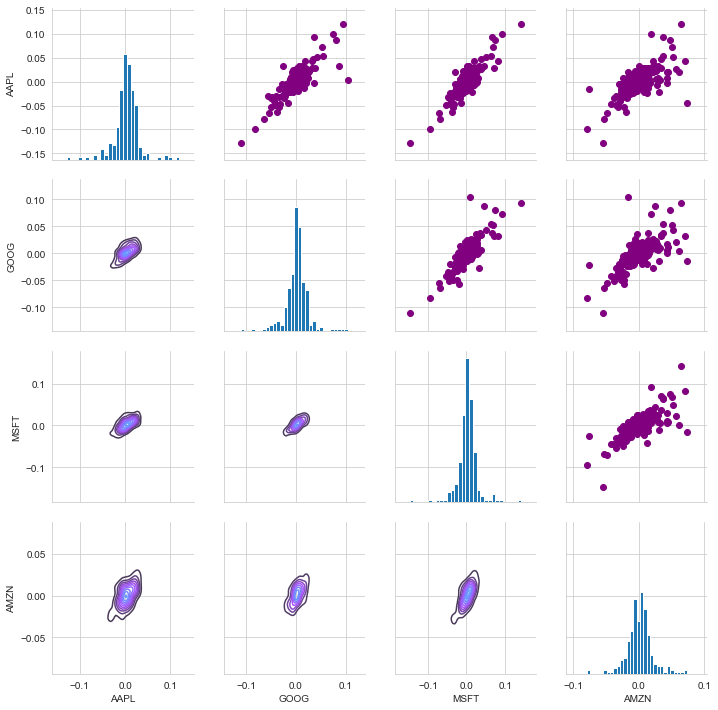

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

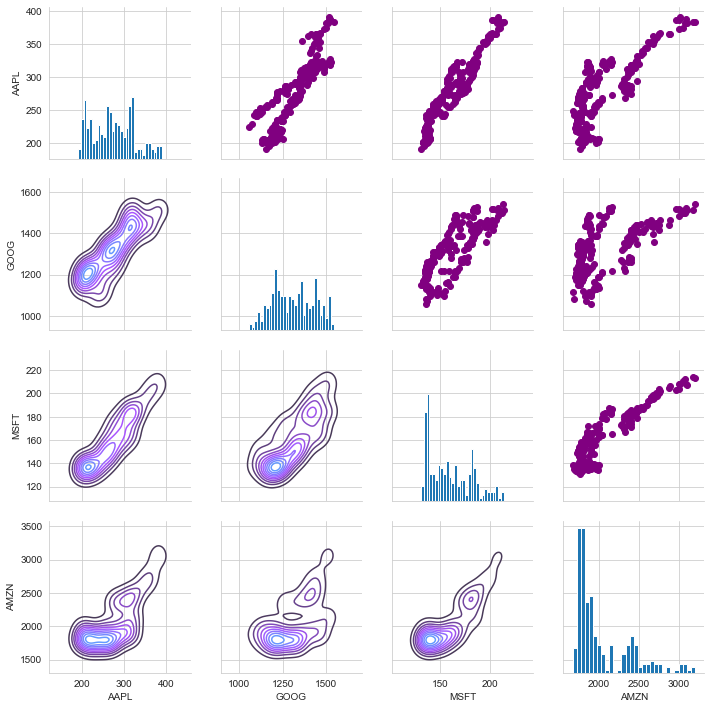

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

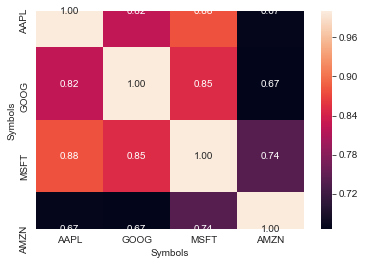

In [25]:
sns.heatmap(tech_rets.dropna().corr(),annot=True,fmt='.2f')

### Risk Analysis

In [26]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-17,NaN,NaN,NaN,NaN
2019-07-18,0.011360,-0.000017,0.001101,-0.007093
2019-07-19,-0.014928,-0.014158,0.001466,-0.006765
2019-07-22,0.022854,0.007052,0.013248,0.010746
2019-07-23,0.007818,0.007152,0.006213,0.004462


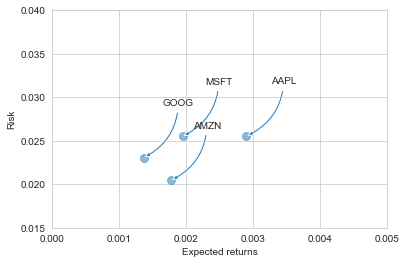

In [27]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

plt.ylim([0.015,0.04])
plt.xlim([0.00,0.005])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50, 50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=-0.3')    
    )

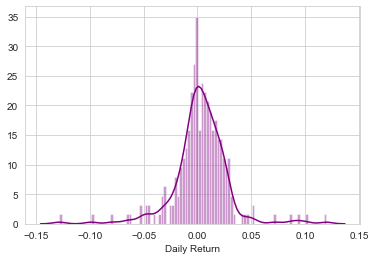

In [28]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [29]:
rets['AAPL'].quantile(0.05)

-0.03421546526840809

In [33]:
for stock in tech_list:
    print("5% VaR for stock {} is {:.3f}".format(stock,rets[stock].quantile(0.05)))

5% VaR for stock AAPL is -0.034
5% VaR for stock GOOG is -0.036
5% VaR for stock MSFT is -0.035
5% VaR for stock AMZN is -0.028


### VaR using Monte Carlo method

In [34]:
days = 365

dt = 1/days

mu = rets['GOOG'].mean()

sigma = rets['GOOG'].std()

In [37]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc= mu*dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price    

In [38]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-17,1158.359985,1145.770020,1150.969971,1146.349976,1170000,1146.349976
2019-07-18,1147.604980,1132.729980,1141.739990,1146.329956,1291300,1146.329956
2019-07-19,1151.140015,1129.619995,1148.189941,1130.099976,1647200,1130.099976
2019-07-22,1139.250000,1124.239990,1133.449951,1138.069946,1301500,1138.069946
2019-07-23,1146.900024,1131.800049,1144.000000,1146.209961,1093700,1146.209961


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

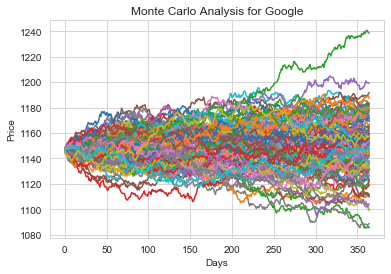

In [39]:
start_price = 1146.35

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")

In [40]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

In [44]:
simulations

array([1077.88888523, 1125.28254326, 1142.15163983, ..., 1115.26001701,
       1096.91624747, 1174.07738597])

Text(0.5, 1.0, 'Final price distribution for Google stock after 365 days')

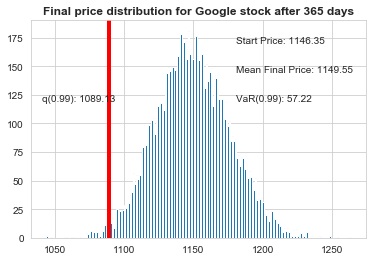

In [45]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start Price: {:.2f}".format(start_price))

plt.figtext(0.6, 0.7, s="Mean Final Price: {:.2f}".format(simulations.mean()))

plt.figtext(0.6, 0.6, s="VaR(0.99): {:.2f}".format(start_price - q) )

plt.figtext(0.15, 0.6, s="q(0.99): {:.2f}".format(q))

plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distribution for Google stock after {} days".format(days), weight='bold')